In [38]:
import torch
from torch import nn


torch.set_default_dtype(torch.float64)

import matplotlib.pyplot as plt

In [39]:
class MLP(nn.Module):
    def __init__(self, dim):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            *[
                nn.Linear(dim, dim),
                nn.ReLU()
            ] * 2
        )
        self.fc = nn.Linear(dim, 1)
        

    def forward(self, x):
        return self.fc(self.layers(x))

In [40]:
input = torch.linspace(-1, 3, 1025)


In [41]:
def sin_emb(x, dim):
    return torch.stack([torch.sin(x * i * torch.pi) for i in range(1, dim + 1, 2)], dim=-1)

In [42]:
result = sin_emb(input, 128)

In [43]:
result[0]

tensor([-1.2246e-16, -3.6739e-16, -6.1232e-16, -8.5725e-16, -1.1022e-15,
        -4.8998e-15,  1.9607e-15, -5.3897e-15,  1.4708e-15, -5.8795e-15,
         9.8096e-16, -6.3694e-15,  4.9110e-16, -6.8593e-15,  1.2380e-18,
        -7.3491e-15, -4.8862e-16, -7.8390e-15, -9.7848e-16, -8.3288e-15,
        -1.5679e-14, -8.8187e-15, -1.9582e-15,  4.9023e-15, -1.6659e-14,
        -9.7984e-15, -2.9379e-15,  3.9226e-15, -1.7639e-14, -1.0778e-14,
        -3.9176e-15,  2.9429e-15, -1.8618e-14, -1.1758e-14, -4.8973e-15,
         1.9631e-15, -1.9598e-14, -1.2738e-14, -5.8771e-15,  9.8343e-16,
        -2.0578e-14,  1.4704e-14, -6.8568e-15, -2.8418e-14,  6.8642e-15,
        -1.4697e-14, -3.6258e-14, -9.7600e-16, -2.2537e-14,  1.2745e-14,
        -8.8162e-15, -3.0377e-14,  4.9048e-15, -1.6656e-14, -3.8218e-14,
        -2.9354e-15, -2.4497e-14,  1.0786e-14, -1.0776e-14, -3.2337e-14,
         2.9453e-15, -1.8616e-14, -4.0177e-14, -4.8949e-15])

In [44]:
mlp = MLP(64)

In [45]:
y = mlp(result)

In [46]:
y[0]

tensor([-0.0824], grad_fn=<SelectBackward0>)

In [47]:
y[512]

tensor([-0.0824], grad_fn=<SelectBackward0>)

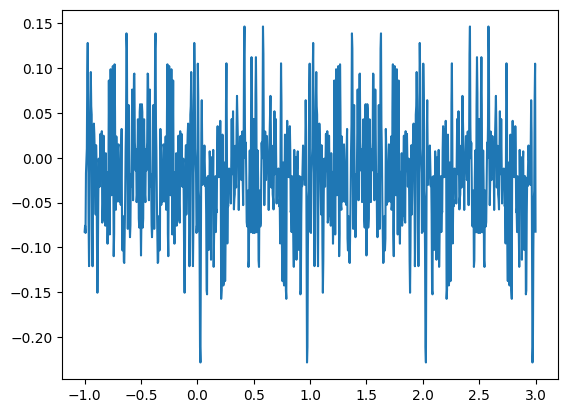

In [48]:
plt.plot(input, y.detach())

In [49]:
import math
def reflective_sin_emb(x, dim):
    result = []
    for i in range(1, dim + 1, 2):
        result.append(torch.sin(i / 2 * torch.pi * x))
    return torch.stack(result, dim=-1)


In [50]:
result = reflective_sin_emb(input, 128)

In [51]:
y = mlp(result)

In [52]:
y[256]

tensor([-0.0824], grad_fn=<SelectBackward0>)

In [53]:
y[1024 - 256]

tensor([-0.0824], grad_fn=<SelectBackward0>)

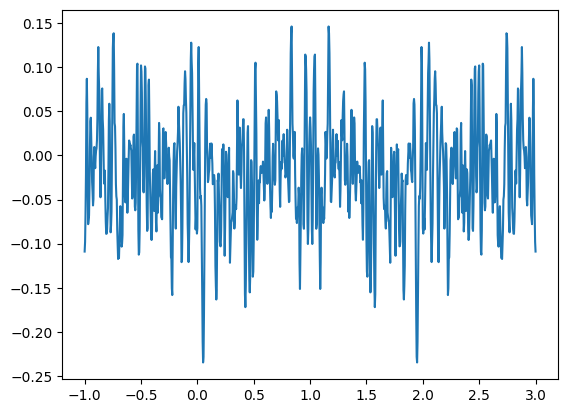

In [54]:
plt.plot(input, y.detach())